In [913]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.style as style 
%matplotlib inline
import seaborn as sns
style.use("seaborn-white")
sns.set_context('poster')

In [914]:
os.chdir("C:\\akul")

In [915]:
df = pd.read_csv("games 2.csv")

In [916]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,Checkmate Square,Files,Ranks
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,f4,A,1.0
1,l1NXvwaE,True,1.500000e+12,1.500000e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,b4,B,2.0
2,mIICvQHh,True,1.500000e+12,1.500000e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,d1,C,3.0
3,kWKvrqYL,True,1.500000e+12,1.500000e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,g7,D,4.0
4,9tXo1AUZ,True,1.500000e+12,1.500000e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,h7,E,5.0


In [917]:
df["Square"]=pd.Series(a.index)
df["Count of Square"] = pd.Series(a.values)

In [918]:
df2 = df2.sort_values("Checkmate Square")
z = df[["Checkmate Square","Count of Square"]]
z = z[:64]
z.set_index("Checkmate Square",inplace=True)
z.sort_index(inplace=True)
z["Count of Square"].values.reshape(8,8)

array([[291., 125., 145., 179., 266., 229., 465., 222.],
       [293., 713., 189., 238., 388., 361., 154., 346.],
       [330., 166., 245., 677., 269., 230., 192., 275.],
       [319., 213., 224., 237., 358., 363., 268., 482.],
       [534., 381., 305., 239., 270., 369., 294., 341.],
       [166., 134., 815., 283., 206., 277., 323., 235.],
       [620., 493., 456., 117., 335., 151., 275., 455.],
       [327., 346., 299., 243., 410., 227., 542., 138.]])

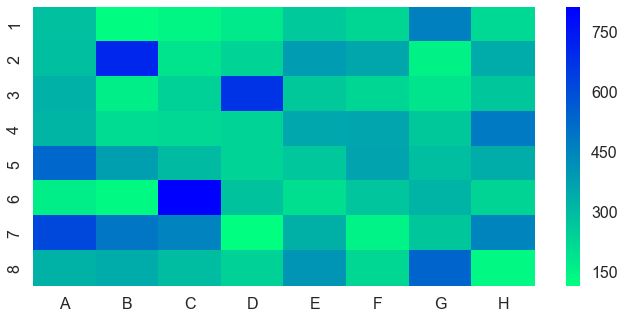

In [976]:
mapp = pd.DataFrame(data=z["Count of Square"].values.reshape(8,8),columns=pd.Series(["A","B","C","D","E","F","G","H"]),index=np.arange(1,9))
plt.figure(figsize=(10,5))
sns.heatmap(mapp,cmap="winter_r")


Text(0,0.5,u'Number of Games')

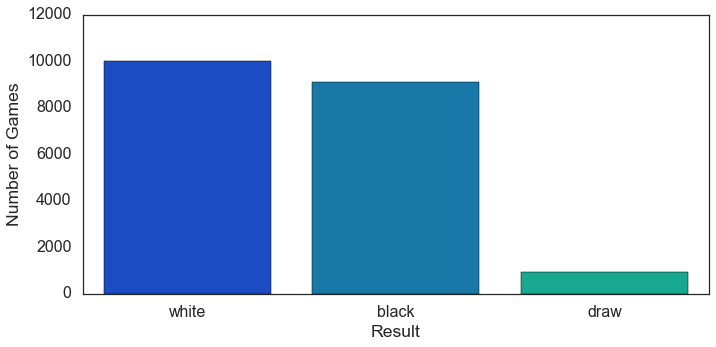

In [945]:
df["winner"].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="winner",palette="winter")
sns.set_context('poster')
plt.xlabel("Result")
plt.ylabel("Number of Games")


Text(0,0.5,u'Top 10 Openings')

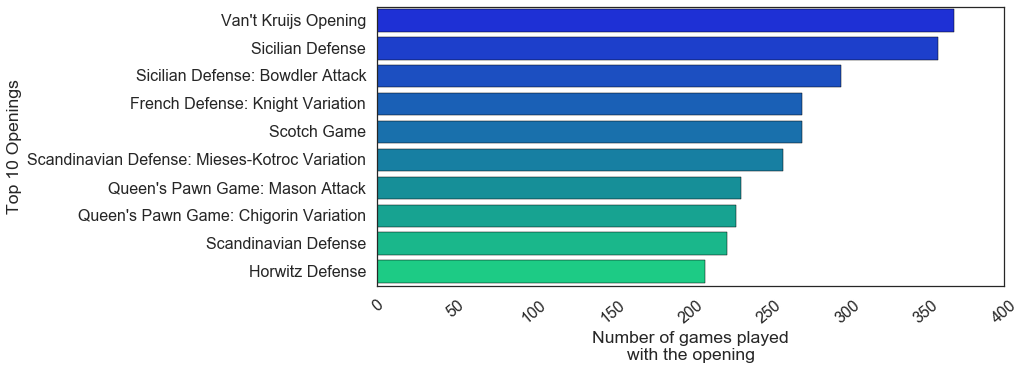

In [968]:
df3 = df[["winner","opening_name"]]
df4 = pd.DataFrame(df3["opening_name"].value_counts()[:10])
df4["name"]=df4.index.tolist()
plt.figure(figsize=(10,5))
sns.barplot(y=df4["name"],x=df4["opening_name"],palette="winter")
plt.xticks(rotation=40)
plt.xlabel("Number of games played\nwith the opening")
plt.ylabel("Top 10 Openings")


Text(0,0.5,u'Top 10 Openings\nWith White Player as Winner')

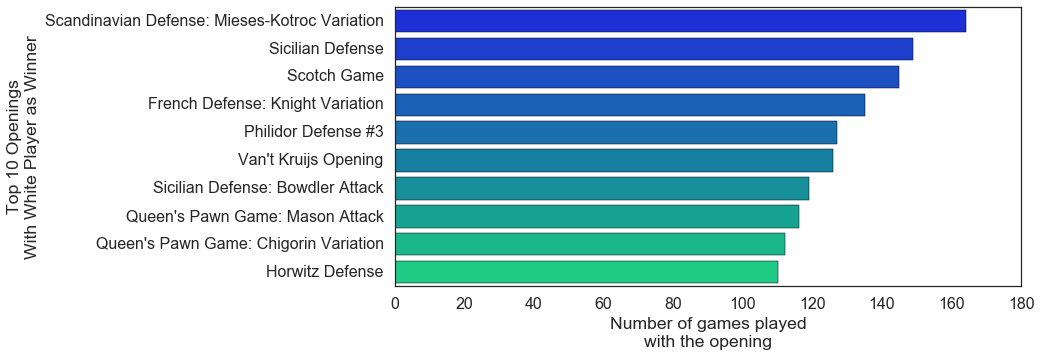

In [967]:
white = df[(df.winner=="white")]
y = white["opening_name"].value_counts()[:10]
x= y.index.tolist()
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x,palette="winter")
plt.xlabel("Number of games played\nwith the opening")
plt.ylabel("Top 10 Openings\nWith White Player as Winner")

Text(0,0.5,u'Top 10 Openings\nWith Black Player as Winner')

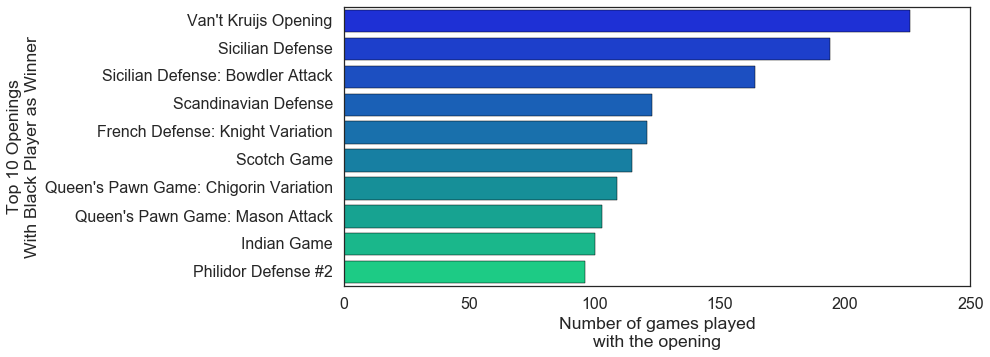

In [966]:
black = df[(df.winner=="black")]
y = black["opening_name"].value_counts()[:10]
x= y.index.tolist()
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x,palette="winter")
plt.xlabel("Number of games played\nwith the opening")
plt.ylabel("Top 10 Openings\nWith Black Player as Winner")

Text(0,0.5,u'Top 10 Openings \nWith Draw as result')

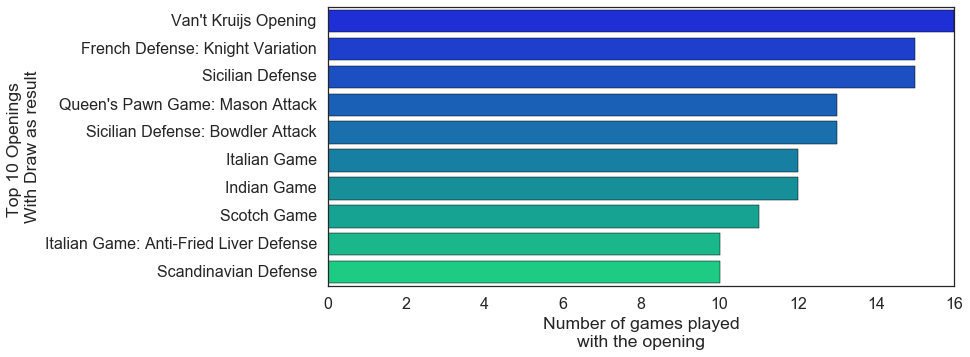

In [965]:
draw = df[(df.winner=="draw")]
y = draw["opening_name"].value_counts()[:10]
x= y.index.tolist()
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x,palette="winter")
plt.xlabel("Number of games played\nwith the opening")
plt.ylabel("Top 10 Openings \nWith Draw as result")

Text(0,0.5,u'')

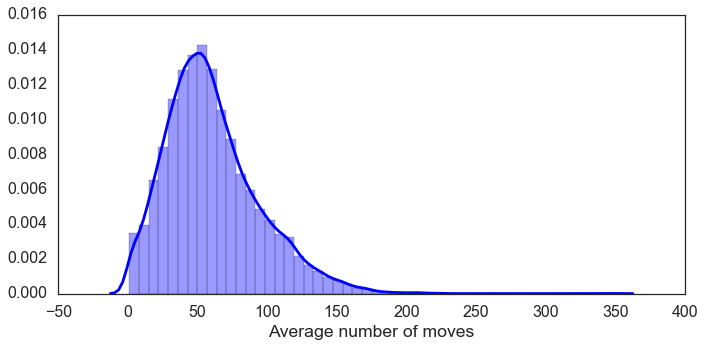

In [964]:
plt.figure(figsize=(10,5))
sns.distplot(df["turns"],color="blue")
plt.xlabel("Average number of moves")
plt.ylabel("")

Text(0,0.5,u'Number of games')

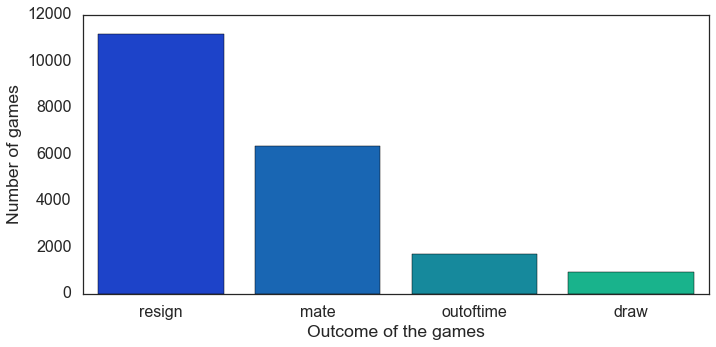

In [962]:
plt.figure(figsize=(10,5))
sns.barplot(y = df["victory_status"].value_counts(),x=df["victory_status"].value_counts().index,palette="winter")
plt.xlabel("Outcome of the games")
plt.ylabel("Number of games")

Text(0,0.5,u'Number of games')

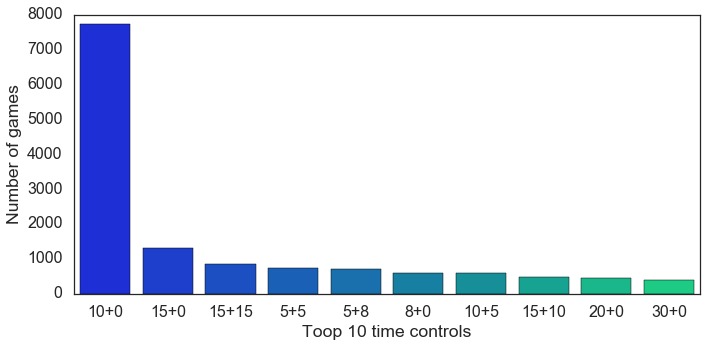

In [970]:
plt.figure(figsize=(10,5))
sns.barplot(y= df["increment_code"].value_counts()[:10],x=df["increment_code"].value_counts()[:10].index,palette="winter")
plt.xlabel("Toop 10 time controls")
plt.ylabel("Number of games")

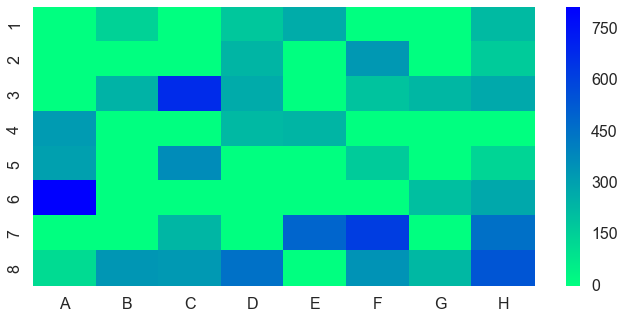

In [975]:
whitech = df[(df["winner"]=="white")]
m = whitech[["Checkmate Square","Count of Square"]]
m=m[:64]
m.set_index("Checkmate Square",inplace=True)
m.sort_index(inplace=True)
m.fillna(value=0,inplace=True)
m["Count of Square"].values.reshape(8,8)
zapp =pd.DataFrame(data=m["Count of Square"].values.reshape(8,8),columns=pd.Series(["A","B","C","D","E","F","G","H"]),index=np.arange(1,9))
plt.figure(figsize=(10,5))
sns.heatmap(zapp,cmap="winter_r")


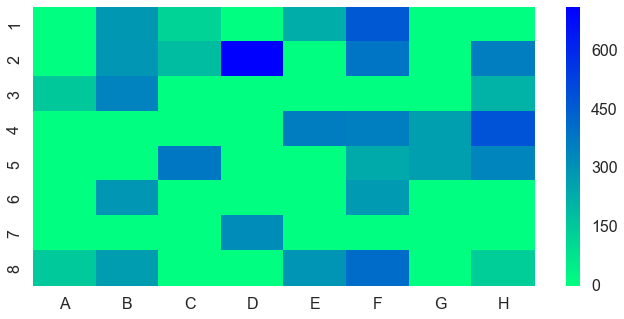

In [977]:
blackch = df[(df["winner"]=="black")]
m = blackch[["Checkmate Square","Count of Square"]]
m=m[:64]
m.set_index("Checkmate Square",inplace=True)
m.sort_index(inplace=True)
m.fillna(value=0,inplace=True)
m["Count of Square"].values.reshape(8,8)
zapp =pd.DataFrame(data=m["Count of Square"].values.reshape(8,8),columns=pd.Series(["A","B","C","D","E","F","G","H"]),index=np.arange(1,9))
plt.figure(figsize=(10,5))
sns.heatmap(zapp,cmap="winter_r")
